In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
pip install gym==0.23.0

  Using cached gym-0.23.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.20.0
    Uninstalling gym-0.20.0:
      Successfully uninstalled gym-0.20.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ravin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
pip show gym

Name: gym
Version: 0.23.0
Summary: Gym: A universal API for reinforcement learning environments
Home-page: https://www.gymlibrary.ml/
Author: Gym Community
Author-email: jkterry@umd.edu
License: MIT
Location: c:\users\ravin\appdata\local\programs\python\python39\lib\site-packages
Requires: cloudpickle, gym-notices, importlib-metadata, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -r requirements.txt

  Using cached numpy-1.26.2-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached matplotlib-3.8.2-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached ipywidgets-8.1.1-py3-none-any.whl (139 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached more_itertools-10.1.0-py3-none-any.whl (55 kB)
  Using cached torch-2.1.1-cp39-cp39-win_amd64.whl (192.2 MB)
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Using cached gym-0.26.2-py3-none-any.whl
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached contourpy-1.2.0-cp39-cp39-win_amd64.whl (181 kB)
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl (56 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached Pillow-10.1.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached fonttools-4.45.1-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached widgetsnbextension-4.0.9-py3-none-any.whl (2.3 MB)
  Using cached jupyterlab_widgets-3.0.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

##### Before submitting, make sure you are adhering to the following rules, which helps us grade your assignment.  Assignments that do not adhere to these rules will be penalized.

 * Make sure your notebook only contains the exercises requested in the notebook, and the written homework (if any) is delivered in class in printed form, i.e. don't submit your written homework as part of the notebook.
 * Make sure you are using Python3.  This notebook is already set up to use Python3 (top right corner);  Do not change this.
 * If a method is provided with a specific signature, do not change the signature in any way, or the default values.
 * Don't hard-code your solutions to the specific environments which it is being used on, or the specific hyper-parameters which it is being used on;  Be as general as possible, which means also using ALL the arguments of the methods your are implementing.
 * Clean up your code before submitting, i.e. remove all print statements that you've used to develop and debug (especially if it's going to clog up the interface by printing thousands of lines).  Only output whatever is required by the exercise.
 * For technical reasons, plots should be contained in their own cell which should run instantly, separate from cells which perform longer computations.  This notebook is already formatted in such a way, please make sure this remains the case.
 * Make sure your notebook runs completely, from start to end, without raising any unintended errors.  After you've made the last edit, Use the option `Kernel -> Restart & Run All` to rerun the entire notebook.  If you end up making ANY edit, re-run everything again.  Always assume any edit you make may have broken your code!

# Homework 6: Deep Q-Networks in Pytorch

In this assignment you will implement deep q-learning using Pytorch.

In [5]:
pip install ipython_genutils

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ravin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
import copy
import math
import os
from collections import namedtuple
# !pip install more_itertools

import ipywidgets as widgets
import matplotlib.pyplot as plt
import more_itertools as mitt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from tqdm.notebook import tqdm
import gym
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 4]

In [ ]:
#### Environments

In this notebook, we will implement DQN and run it on four environments which have a continuous state-space and discrete action-space.  There are:

 * CartPole:  Balance a pole on a moving cart (https://gym.openai.com/envs/CartPole-v1/).
 * Mountain Car:  Gather momentum to climb a hill (https://gym.openai.com/envs/MountainCar-v0/).
 * AcroBot:  A two-link robot needs to swing and reach the area above a line (https://gym.openai.com/envs/Acrobot-v1/).
 * LunarLander:  A spaceship needs to fly and land in the landing spot.  (https://gym.openai.com/envs/LunarLander-v2/).

In [8]:
envs = {
    'cartpole': gym.make('CartPole-v1'),
    'mountaincar': gym.make('MountainCar-v0'),
    'acrobot': gym.make('Acrobot-v1'),
    'lunarlander': gym.make('LunarLander-v2'),
}

These environments are particularly cool because they all include a graphical visualization which we can use to visualize our learned policies.  Run the folling cell and click the buttons to run the visualization with a random policy.

In [9]:
def render(env, policy=None):
    """Graphically render an episode using the given policy

    :param env:  Gym environment
    :param policy:  function which maps state to action.  If None, the random
                    policy is used.
    """

    if policy is None:

        def policy(state):
            return env.action_space.sample()

    state = env.reset()
    env.render()

    while True:
        action = policy(state)
        state, _, done, _ = env.step(action)
        env.render()

        if done:
            break
            
    env.close()

In [15]:
pip install gym==0.20

You should consider upgrading via the 'c:\Users\ravin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Using cached gym-0.20.0.tar.gz (1.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for gym, since package 'wheel' is not installed.
  Attempting uninstall: gym
    Found existing installation: gym 0.23.0
    Uninstalling gym-0.23.0:
      Successfully uninstalled gym-0.23.0
  Running setup.py install for gym: started
  Running setup.py install for gym: finished with status 'done'


In [14]:
pip install pyglet==1.5.27

  Using cached pyglet-1.5.27-py3-none-any.whl (1.1 MB)
  Attempting uninstall: pyglet
    Found existing installation: pyglet 2.0.10
    Uninstalling pyglet-2.0.10:
      Successfully uninstalled pyglet-2.0.10
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ravin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
#  Jupyter UI

def button_callback(button):
    for b in buttons:
        b.disabled = True

    env = envs[button.description]
    render(env)
    env.close()

    for b in buttons:
        b.disabled = False

buttons = []
for env_id in envs.keys():
    button = widgets.Button(description=env_id)
    button.on_click(button_callback)
    buttons.append(button)

print('Click a button to run a random policy:')
widgets.HBox(buttons)

Click a button to run a random policy:


## Misc Utilities

Some are provided, some you should implement

### Smoothing

In this homework, we'll do some plotting of noisy data, so here is the smoothing function which was also used in the previous homework.

In [11]:
def rolling_average(data, *, window_size):
    """Smoothen the 1-d data array using a rollin average.

    Args:
        data: 1-d numpy.array
        window_size: size of the smoothing window

    Returns:
        smooth_data: a 1-d numpy.array with the same size as data
    """
    assert data.ndim == 1
    kernel = np.ones(window_size)
    smooth_data = np.convolve(data, kernel) / np.convolve(
        np.ones_like(data), kernel
    )
    return smooth_data[: -window_size + 1]

### Q1 (1 pt):  Exponential $\epsilon$-Greedy Decay

This time we'll switch from using a linear decay to an exponential decay, defined as
$$\epsilon_t = a \exp (b t)$$
where $a$ and $b$ are the parameters of the schedule.

The interface to the scheduler is the same as in the linear case from the previous homework, i.e. it receives the initial value, the final value, and in how many steps to go from initial to final.  Your task is to compute parameters `a` and `b` to make the scheduler work as expected.

In [12]:
class ExponentialSchedule:
    def __init__(self, value_from, value_to, num_steps):
        """Exponential schedule from `value_from` to `value_to` in `num_steps` steps.

        $value(t) = a \exp (b t)$

        :param value_from: initial value
        :param value_to: final value
        :param num_steps: number of steps for the exponential schedule
        """
        self.value_from = value_from
        self.value_to = value_to
        self.num_steps = num_steps

        # YOUR CODE HERE:  determine the `a` and `b` parameters such that the schedule is correct
        self.a = value_from
        self.b = (np.log(value_to) - np.log(self.a))/(num_steps-1)

    def value(self, step) -> float:
        """Return exponentially interpolated value between `value_from` and `value_to`interpolated value between.

        returns {
            `value_from`, if step == 0 or less
            `value_to`, if step == num_steps - 1 or more
            the exponential interpolation between `value_from` and `value_to`, if 0 <= steps < num_steps
        }

        :param step:  The step at which to compute the interpolation.
        :rtype: float.  The interpolated value.
        """

        # YOUR CODE HERE:  implement the schedule rule as described in the docstring,
        # using attributes `self.a` and `self.b`.
        # value = ...
        if step <= 0:
            return self.value_from
        elif step >= self.num_steps-1:
            return self.value_to
        else:
            value = self.a * np.exp(self.b * (step))
        
        return value


# test code, do not edit


def _test_schedule(schedule, step, value, ndigits=5):
    """Tests that the schedule returns the correct value."""
    v = schedule.value(step)
    if not round(v, ndigits) == round(value, ndigits):
        raise Exception(
            f'For step {step}, the scheduler returned {v} instead of {value}'
        )


_schedule = ExponentialSchedule(0.1, 0.2, 3)
_test_schedule(_schedule, -1, 0.1)
_test_schedule(_schedule, 0, 0.1)
_test_schedule(_schedule, 1, 0.141421356237309515)
_test_schedule(_schedule, 2, 0.2)
_test_schedule(_schedule, 3, 0.2)
del _schedule

_schedule = ExponentialSchedule(0.5, 0.1, 5)
_test_schedule(_schedule, -1, 0.5)
_test_schedule(_schedule, 0, 0.5)
_test_schedule(_schedule, 1, 0.33437015248821106)
_test_schedule(_schedule, 2, 0.22360679774997905)
_test_schedule(_schedule, 3, 0.14953487812212207)
_test_schedule(_schedule, 4, 0.1)
_test_schedule(_schedule, 5, 0.1)
del _schedule

### Q2 (1 pt):  Replay Memory

Now we will implement the Replay Memory, the data-structure where we store previous experiences so that we can re-sample and train on them.

In [13]:
# Batch namedtuple, i.e. a class which contains the given attributes
Batch = namedtuple(
    'Batch', ('states', 'actions', 'rewards', 'next_states', 'dones')
)


class ReplayMemory:
    def __init__(self, max_size, state_size):
        """Replay memory implemented as a circular buffer.

        Experiences will be removed in a FIFO manner after reaching maximum
        buffer size.

        Args:
            - max_size: Maximum size of the buffer.
            - state_size: Size of the state-space features for the environment.
        """
        self.max_size = max_size
        self.state_size = state_size

        # preallocating all the required memory, for speed concerns
        self.states = torch.empty((max_size, state_size))
        self.actions = torch.empty((max_size, 1), dtype=torch.long)
        self.rewards = torch.empty((max_size, 1))
        self.next_states = torch.empty((max_size, state_size))
        self.dones = torch.empty((max_size, 1), dtype=torch.bool)

        # pointer to the current location in the circular buffer
        self.idx = 0
        # indicates number of transitions currently stored in the buffer
        self.size = 0

    def add(self, state, action, reward, next_state, done):
        """Add a transition to the buffer.

        :param state:  1-D np.ndarray of state-features.
        :param action:  integer action.
        :param reward:  float reward.
        :param next_state:  1-D np.ndarray of state-features.
        :param done:  boolean value indicating the end of an episode.
        """

        # YOUR CODE HERE:  store the input values into the appropriate
        # attributes, using the current buffer position `self.idx`
        self.states[self.idx] = torch.from_numpy(state)
        self.actions[self.idx] = torch.tensor(action)
        self.rewards[self.idx] = torch.tensor(reward)
        self.next_states[self.idx] = torch.from_numpy(next_state)
        self.dones[self.idx] = torch.tensor(done)
        ...
        
        # DO NOT EDIT
        # circulate the pointer to the next position
        self.idx = (self.idx + 1) % self.max_size
        # update the current buffer size
        self.size = min(self.size + 1, self.max_size)

    def sample(self, batch_size) -> Batch:
        """Sample a batch of experiences.

        If the buffer contains less that `batch_size` transitions, sample all
        of them.

        :param batch_size:  Number of transitions to sample.
        :rtype: Batch
        """

        # YOUR CODE HERE:  randomly sample an appropriate number of
        # transitions *without replacement*.  If the buffer contains less than
        # `batch_size` transitions, return all of them.  The return type must
        # be a `Batch`.

        # sample_indices = ...
        # batch = Batch(...)

        sample_indices = np.random.choice(self.size,batch_size,replace=False)
        if self.size < batch_size:
            batch = Batch(self.states,self.actions,self.rewards,self.next_states,self.dones)
        else:
            batch = Batch(self.states[sample_indices],self.actions[sample_indices],
                      self.rewards[sample_indices],self.next_states[sample_indices],
                      self.dones[sample_indices])
        return batch

    def populate(self, env, num_steps):
        """Populate this replay memory with `num_steps` from the random policy.

        :param env:  Openai Gym environment
        :param num_steps:  Number of steps to populate the
        """

        # YOUR CODE HERE:  run a random policy for `num_steps` time-steps and
        # populate the replay memory with the resulting transitions.
        # Hint:  don't repeat code!  Use the self.add() method!

        state = env.reset()
        for steps in range(num_steps):
            action = env.action_space.sample()
            next_state, reward, done, *_ = env.step(action)
            # print("next_state = ", next_state)
            next_state = np.array(next_state)
            self.add(state,action,reward,next_state,done)
            if done:
                state = env.reset()
            else:
                state = next_state

### Q3 (2 pts):  Pytorch DQN module

Pytorch is a numeric computation library akin to numpy, which also features automatic differentiation.  This means that the library automatically computes the gradients for many differentiable operations, something we will exploit to train our models without having to program the gradients' code.  There are a few caveats:  sometimes we have to pay explicit attention to whether the operations we are using are implemented by the library (most are), and there are a number of operations which don't play well with automatic differentiation (most notably, in-place assignments).

This library is a tool, and as many tools you'll have to learn how to use it well.  Sometimes not using it well means that your program will crash.  Sometimes it means that your program won't crash but won't be computing the correct outputs.  And sometimes it means that it will compute the correct things, but is less efficient than it could otherwise be.  This library is SUPER popular, and online resources abound, so take your time to learn the basics.  If you're having problems, first try to debug it yourself, also looking up the errors you get online.  You can also use Piazza and the office hours to ask for help with problems.

In the next cell, we inherit from the base class `torch.nn.Module` to implement our DQN module, which takes state-vectors and returns the respective action-values.

In [14]:
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim, *, num_layers=3, hidden_dim=256):
        """Deep Q-Network PyTorch model.

        Args:
            - state_dim: Dimensionality of states
            - action_dim: Dimensionality of actions
            - num_layers: Number of total linear layers
            - hidden_dim: Number of neurons in the hidden layers
        """

        super().__init__()
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.num_layers = num_layers
        self.hidden_dim = hidden_dim

        #  define the layers of your model such that
        # * there are `num_layers` nn.Linear modules / layers
        # * all activations except the last should be ReLU activations
        #   (this can be achieved either using a nn.ReLU() object or the nn.functional.relu() method)
        # * the last activation can either be missing, or you can use nn.Identity()
        self.layers = nn.ModuleList()
        for i in range(num_layers - 1):  # Exclude the output layer
            if i == 0:
                in_features = state_dim
            else:
                in_features = hidden_dim
            self.layers.append(nn.Linear(in_features, hidden_dim))

        # Define the output layer
        self.output_layer = nn.Linear(hidden_dim, action_dim)

    def forward(self, states) -> torch.Tensor:
        """Q function mapping from states to action-values.

        :param states: (*, S) torch.Tensor where * is any number of additional
                dimensions, and S is the dimensionality of state-space.
        :rtype: (*, A) torch.Tensor where * is the same number of additional
                dimensions as the `states`, and A is the dimensionality of the
                action-space.  This represents the Q values Q(s, .).
        """
        # use the defined layers and activations to compute
        # the action-values tensor associated with the input states.
        # Pass the input state through the hidden layers
        for layer in self.layers:
            states = nn.functional.relu(layer(states))

        # Output the Q-values for all actions
        q_values = self.output_layer(states)
        return q_values

    # utility methods for cloning and storing models.  DO NOT EDIT
    @classmethod
    def custom_load(cls, data):
        model = cls(*data['args'], **data['kwargs'])
        model.load_state_dict(data['state_dict'])
        return model

    def custom_dump(self):
        return {
            'args': (self.state_dim, self.action_dim),
            'kwargs': {
                'num_layers': self.num_layers,
                'hidden_dim': self.hidden_dim,
            },
            'state_dict': self.state_dict(),
        }


# test code, do not edit


def _test_dqn_forward(dqn_model, input_shape, output_shape):
    """Tests that the dqn returns the correctly shaped tensors."""
    inputs = torch.torch.randn((input_shape))
    outputs = dqn_model(inputs)

    if not isinstance(outputs, torch.FloatTensor):
        raise Exception(
            f'DQN.forward returned type {type(outputs)} instead of torch.Tensor'
        )

    if outputs.shape != output_shape:
        raise Exception(
            f'DQN.forward returned tensor with shape {outputs.shape} instead of {output_shape}'
        )

    if not outputs.requires_grad:
        raise Exception(
            f'DQN.forward returned tensor which does not require a gradient (but it should)'
        )


dqn_model = DQN(10, 4)
_test_dqn_forward(dqn_model, (64, 10), (64, 4))
_test_dqn_forward(dqn_model, (2, 3, 10), (2, 3, 4))
del dqn_model

dqn_model = DQN(64, 16)
_test_dqn_forward(dqn_model, (64, 64), (64, 16))
_test_dqn_forward(dqn_model, (2, 3, 64), (2, 3, 16))
del dqn_model

# testing custom dump / load
dqn1 = DQN(10, 4, num_layers=10, hidden_dim=20)
dqn2 = DQN.custom_load(dqn1.custom_dump())
assert dqn2.state_dim == 10
assert dqn2.action_dim == 4
assert dqn2.num_layers == 10
assert dqn2.hidden_dim == 20

### Q4 (1 pt):  Single batch-update

In [15]:
def train_dqn_batch(optimizer, batch, dqn_model, dqn_target, gamma) -> float:
    """Perform a single batch-update step on the given DQN model.

    :param optimizer: nn.optim.Optimizer instance.
    :param batch:  Batch of experiences (class defined earlier).
    :param dqn_model:  The DQN model to be trained.
    :param dqn_target:  The target DQN model, ~NOT~ to be trained.
    :param gamma:  The discount factor.
    :rtype: float  The scalar loss associated with this batch.
    """
    # YOUR CODE HERE:  compute the values and target_values tensors using the
    # given models and the batch of data.
    # values = ...
    # target_values = ...
    states,actions,rewards,next_states,dones = batch

    #not terminla experiences
    not_done_mask = torch.logical_not(dones)
    # Q-values (predicted values) for the given states and actions
    values = dqn_model(states).gather(1,actions)

    #taking the maximum Q-value for each next state and multiplying it by the discount factor, then adding the reward
    with torch.no_grad():
        target_values =  rewards + gamma * dqn_target(next_states).max(1)[0].unsqueeze(1)*not_done_mask
    # DO NOT EDIT FURTHER

    assert (
        values.shape == target_values.shape
    ), 'Shapes of values tensor and target_values tensor do not match.'

    # testing that the value tensor requires a gradient,
    # and the target_values tensor does not
    assert values.requires_grad, 'values tensor should not require gradients'
    assert (
        not target_values.requires_grad
    ), 'target_values tensor should require gradients'

    # computing the scalar MSE loss between computed values and the TD-target
    loss = F.mse_loss(values, target_values)

    optimizer.zero_grad()  # reset all previous gradients
    loss.backward()  # compute new gradients
    optimizer.step()  # perform one gradient descent step

    return loss.item()

### Q5 (2 pts):

In [40]:
from tqdm.notebook import tqdm_notebook

In [16]:
import random
def train_dqn(
    env,
    num_steps,
    *,
    num_saves=5,
    replay_size,
    replay_prepopulate_steps=0,
    batch_size,
    exploration,
    gamma,
):
    """
    DQN algorithm.

    Compared to previous training procedures, we will train for a given number
    of time-steps rather than a given number of episodes.  The number of
    time-steps will be in the range of millions, which still results in many
    episodes being executed.

    Args:
        - env: The openai Gym environment
        - num_steps: Total number of steps to be used for training
        - num_saves: How many models to save to analyze the training progress.
        - replay_size: Maximum size of the ReplayMemory
        - replay_prepopulate_steps: Number of steps with which to prepopulate
                                    the memory
        - batch_size: Number of experiences in a batch
        - exploration: a ExponentialSchedule
        - gamma: The discount factor

    Returns: (saved_models, returns)
        - saved_models: Dictionary whose values are trained DQN models
        - returns: Numpy array containing the return of each training episode
        - lengths: Numpy array containing the length of each training episode
        - losses: Numpy array containing the loss of each training batch
    """
    # check that environment states are compatible with our DQN representation
    assert (
        isinstance(env.observation_space, gym.spaces.Box)
        and len(env.observation_space.shape) == 1
    )

    # get the state_size from the environment
    state_size = env.observation_space.shape[0]

    # initialize the DQN and DQN-target models
    dqn_model = DQN(state_size, env.action_space.n)
    dqn_target = DQN.custom_load(dqn_model.custom_dump())

    # initialize the optimizer
    optimizer = torch.optim.Adam(dqn_model.parameters())

    # initialize the replay memory and prepopulate it
    memory = ReplayMemory(replay_size, state_size)
    memory.populate(env, replay_prepopulate_steps)

    # initiate lists to store returns, lengths and losses
    rewards = []
    returns = []
    lengths = []
    losses = []

    # initiate structures to store the models at different stages of training
    t_saves = np.linspace(0, num_steps, num_saves - 1, endpoint=False)
    saved_models = {}

    i_episode = 0  # use this to indicate the index of the current episode
    t_episode = 0  # use this to indicate the time-step inside current episode

    state = env.reset()  # initialize state of first episode

    # iterate for a total of `num_steps` steps
    pbar = tqdm.trange(num_steps, ncols=100)
    for t_total in pbar:
        # use t_total to indicate the time-step from the beginning of training

        # save model
        if t_total in t_saves:
            model_name = f'{100 * t_total / num_steps:04.1f}'.replace('.', '_')
            saved_models[model_name] = copy.deepcopy(dqn_model)

        # YOUR CODE HERE:
        #  * sample an action from the DQN using epsilon-greedy
        #  * use the action to advance the environment by one step
        #  * store the transition into the replay memory
        random_prob = random.random()
        epsilon_threshold = exploration.value(t_total)
        if random_prob > epsilon_threshold:
            with torch.no_grad():
                action = dqn_model(torch.from_numpy(state)).max(0)[1].item()
        else:
            action = env.action_space.sample()
            
        next_state,reward,done,_ = env.step(action)
        memory.add(state,action,reward,next_state,done)
        rewards.append(reward)
        
        
        # YOUR CODE HERE:  once every 4 steps,
        #  * sample a batch from the replay memory
        #  * perform a batch update (use the train_dqn_batch() method!)
        
        if t_total % 4 == 0:
            batch = memory.sample(batch_size)
            batch_loss = train_dqn_batch(optimizer,batch,dqn_model,dqn_target,gamma)
            losses.append(batch_loss)

        # YOUR CODE HERE:  once every 10_000 steps,
        #  * update the target network (use the dqn_model.state_dict() and
        #    dqn_target.load_state_dict() methods!)
        if t_total % 10000 == 0:
            dqn_target.load_state_dict(dqn_model.state_dict())
        

        if done:
            # YOUR CODE HERE:  anything you need to do at the end of an
            # episode, e.g. compute return G, store stuff, reset variables,
            # indices, lists, etc.

            state = env.reset()
            lengths.append(t_episode)
            i_episode +=1
            G = np.sum([np.power(gamma,i) * rewards[i] for i in range(len(rewards))])
            returns.append(G)

            pbar.set_description(
                f'Episode: {i_episode} | Steps: {t_episode + 1} | Return: {G:5.2f} | Epsilon: {epsilon_threshold:4.2f}'
            )

            t_episode = 0
            rewards = []
        else:
            # YOUR CODE HERE:  anything you need to do within an episode
            state = next_state
            t_episode += 1

    saved_models['100_0'] = copy.deepcopy(dqn_model)

    return (
        saved_models,
        np.array(returns),
        np.array(lengths),
        np.array(losses),
    )

### Q6 (1 pt): Evaluation of DQN on the 4 environments

#### CartPole

Test your implentation on the cartpole environment.  Training will take much longer than in the previous homeworks, so this time you won't have to find good hyper-parameters, or to train multiple runs.  This cell should take about 60-90 minutes to run.  After training, run the last cell in this notebook to view the policies which were obtained at 0%, 25%, 50%, 75% and 100% of the training.

In [22]:
pip install ipywidgets==7.5.1 

     -------------------------------------- 121.6/121.6 KB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.9
    Uninstalling widgetsnbextension-4.0.9:
      Successfully uninstalled widgetsnbextension-4.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.1
    Uninstalling ipywidgets-8.1.1:
      Successfully uninstalled ipywidgets-8.1.1
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ravin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [18]:
pip install tqdm==4.50.0

     -------------------------------------- 70.7/70.7 KB 975.4 kB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\ravin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [36]:
pip install tqdm --upgrade

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tqdm in c:\users\ravin\appdata\local\programs\python\python39\lib\site-packages (4.50.0)
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.50.0
    Uninstalling tqdm-4.50.0:
      Successfully uninstalled tqdm-4.50.0



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\ravin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [20]:
pip show tqdm

Name: tqdm
Version: 4.66.1
Summary: Fast, Extensible Progress Meter
Home-page: 
Author: 
Author-email: 
License: MPL-2.0 AND MIT
Location: c:\users\ravin\appdata\local\programs\python\python39\lib\site-packages
Requires: colorama
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [13]:
import tqdm, sys
print(tqdm.__version__, sys.version, sys.platform)

4.66.1 3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)] win32


In [42]:
env = envs['cartpole']
gamma = 0.99

# we train for many time-steps;  as usual, you can decrease this during development / debugging.
# but make sure to restore it to 1_500_000 before submitting.
num_steps = 1_500_000
num_saves = 5  # save models at 0%, 25%, 50%, 75% and 100% of training

replay_size = 200_000
replay_prepopulate_steps = 50_000

batch_size = 64
exploration = ExponentialSchedule(1.0, 0.01, 1_000_000)

# this should take about 90-120 minutes on a generic 4-core laptop
dqn_models, returns, lengths, losses = train_dqn(
    env,
    num_steps,
    num_saves=num_saves,
    replay_size=replay_size,
    replay_prepopulate_steps=replay_prepopulate_steps,
    batch_size=batch_size,
    exploration=exploration,
    gamma=gamma,
)

assert len(dqn_models) == num_saves
assert all(isinstance(value, DQN) for value in dqn_models.values())

# saving computed models to disk, so that we can load and visualize them later.
checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
torch.save(checkpoint, f'checkpoint_{env.spec.id}.pt')
np.save('cartpole_returns.npy',returns)
np.save('cartpole_lengths.npy',lengths)
np.save('cartpole_losses.npy',losses)

Episode: 18285 | Steps: 252 | Return: 92.06 | Epsilon: 0.01: 100%|█| 1500000/1500000 [2:38:25<00:00,


###### Plot the returns, lengths and losses obtained while running DQN on the cartpole environment.

Again, plot the raw data and the smoothened data **inside the same plot**, i.e. you should have 3 plots total.

In [44]:
### YOUR PLOTTING CODE HERE
checkpoint_path = "C://Users//ravin//Desktop//Fall'23//RL//ex6//checkpoint_CartPole-v1.pt"
checkpoint = torch.load(checkpoint_path)

In [46]:
cartpole_loss = np.load('cartpole_losses.npy')
cartpole_return = np.load('cartpole_returns.npy')

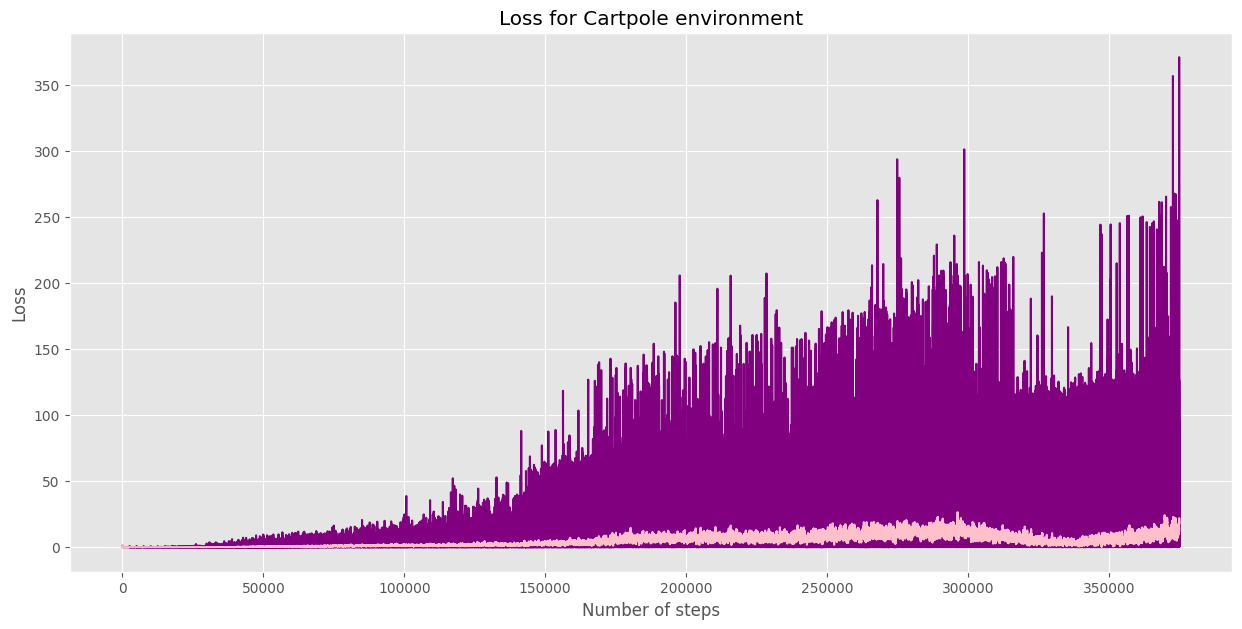

In [49]:
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(cartpole_loss,color = 'purple')
rolling_av = rolling_average(cartpole_loss, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Loss")
plt.title("Loss for Cartpole environment")
plt.show()

Exception ignored in: <function tqdm.__del__ at 0x000001F13B15EAF0>
Traceback (most recent call last):
  File "c:\Users\ravin\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "c:\Users\ravin\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\std.py", line 1278, in close
    if self.last_print_t < self.start_t + self.delay:
AttributeError: 'tqdm' object has no attribute 'last_print_t'


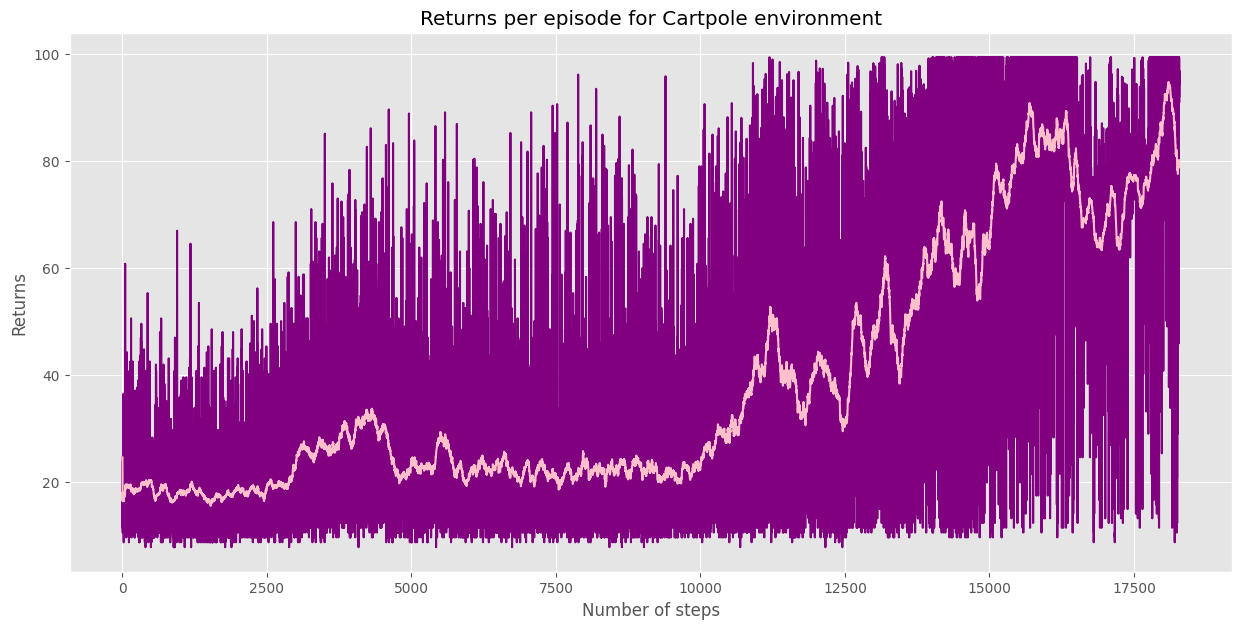

In [51]:
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(cartpole_return,color = 'purple')
rolling_av = rolling_average(cartpole_return, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Returns")
plt.title("Returns per episode for Cartpole environment")
plt.show()

In [8]:

cartpole_length = np.load('cartpole_lengths.npy')

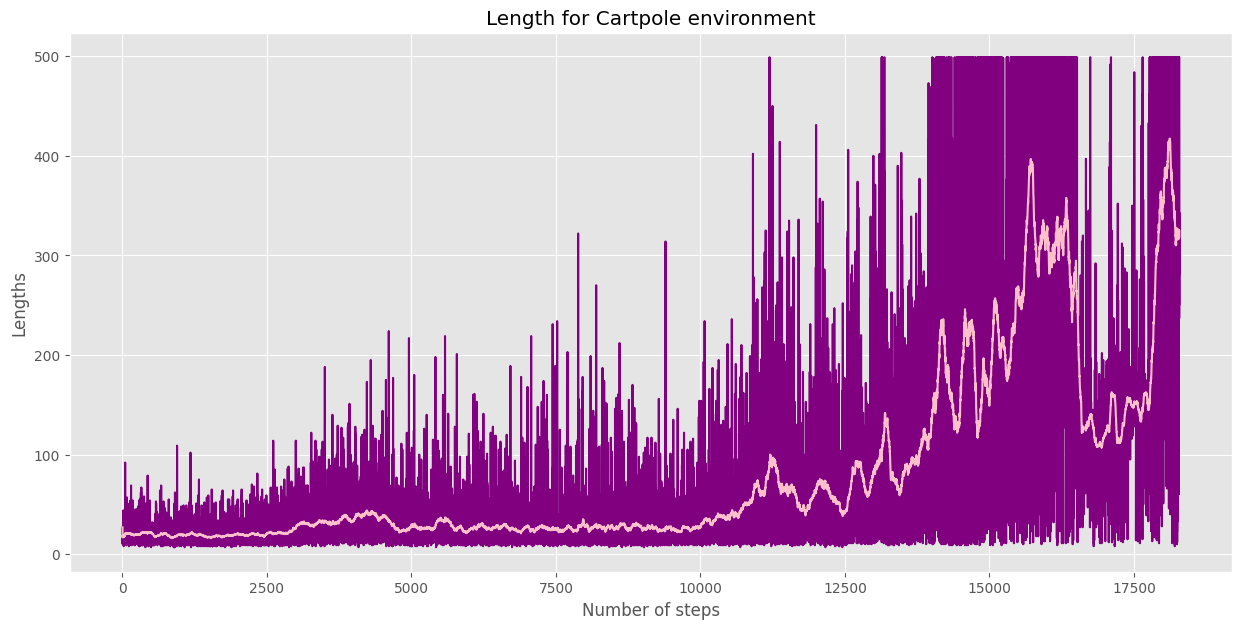

In [11]:
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(cartpole_length,color = 'purple')
rolling_av = rolling_average(cartpole_length, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Lengths")
plt.title("Length for Cartpole environment")
plt.show()

#### MountainCar

Test your implentation on the mountaincar environment.  Training will take much longer than in the previous homeworks, so this time you won't have to find good hyper-parameters, or to train multiple runs.  This cell should take about 60-90 minutes to run.  After training, run the last cell in this notebook to view the policies which were obtained at 0%, 25%, 50%, 75% and 100% of the training.

In [52]:
env = envs['mountaincar']
gamma = 0.99

# we train for many time-steps;  as usual, you can decrease this during development / debugging.
# but make sure to restore it to 1_500_000 before submitting.
num_steps = 1_500_000
num_saves = 5  # save models at 0%, 25%, 50%, 75% and 100% of training

replay_size = 200_000
replay_prepopulate_steps = 50_000

batch_size = 64
exploration = ExponentialSchedule(1.0, 0.01, 1_000_000)

# this should take about 90-120 minutes on a generic 4-core laptop
dqn_models, returns, lengths, losses = train_dqn(
    env,
    num_steps,
    num_saves=num_saves,
    replay_size=replay_size,
    replay_prepopulate_steps=replay_prepopulate_steps,
    batch_size=batch_size,
    exploration=exploration,
    gamma=gamma,
)

assert len(dqn_models) == num_saves
assert all(isinstance(value, DQN) for value in dqn_models.values())

# saving computed models to disk, so that we can load and visualize them later.
checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
torch.save(checkpoint, f'checkpoint_{env.spec.id}.pt')
np.save('mountain_car_returns.npy',returns)
np.save('mountain_car_lengths.npy',lengths)
np.save('mountain_car_losses.npy',losses)

Episode: 10701 | Steps: 85 | Return: -57.44 | Epsilon: 0.01: 100%|█| 1500000/1500000 [2:09:24<00:00,


###### Plot the returns, lengths and losses obtained while running DQN on the mountaincar environment.

Again, plot the raw data and the smoothened data **inside the same plot**, i.e. you should have 3 plots total.

In [53]:
mountain_car_loss = np.load('mountain_car_losses.npy')
mountain_car_return = np.load('mountain_car_returns.npy')

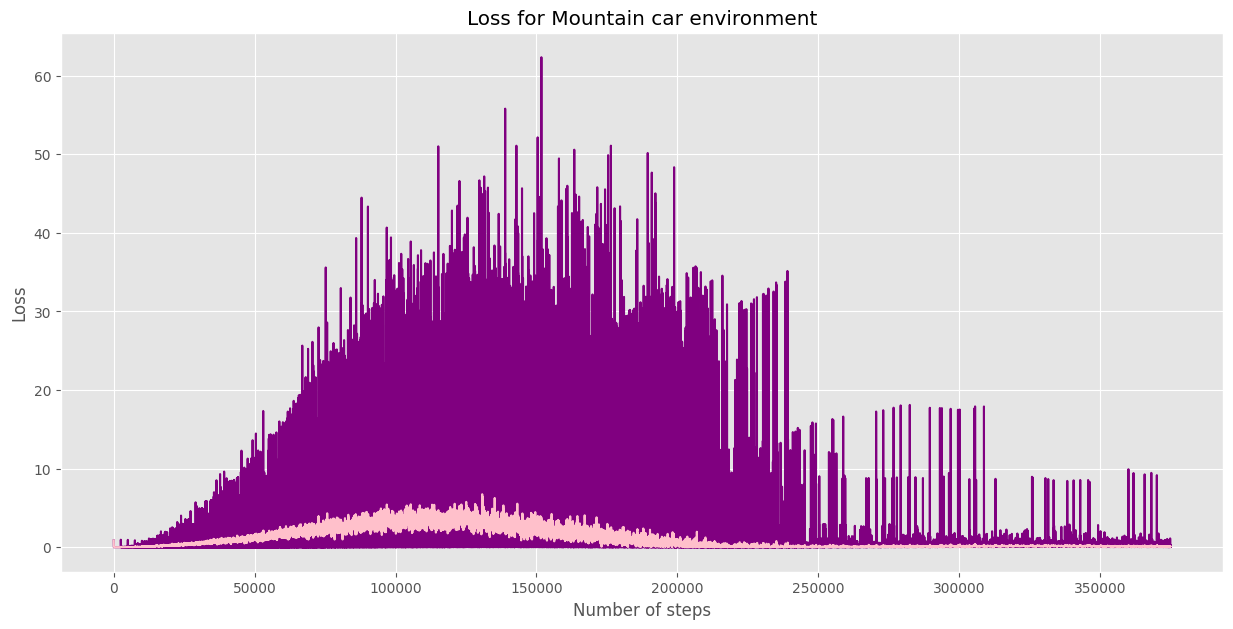

In [54]:
### YOUR PLOTTING CODE HERE
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(mountain_car_loss,color = 'purple')
rolling_av = rolling_average(mountain_car_loss, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Loss")
plt.title("Loss for Mountain car environment")
plt.show()

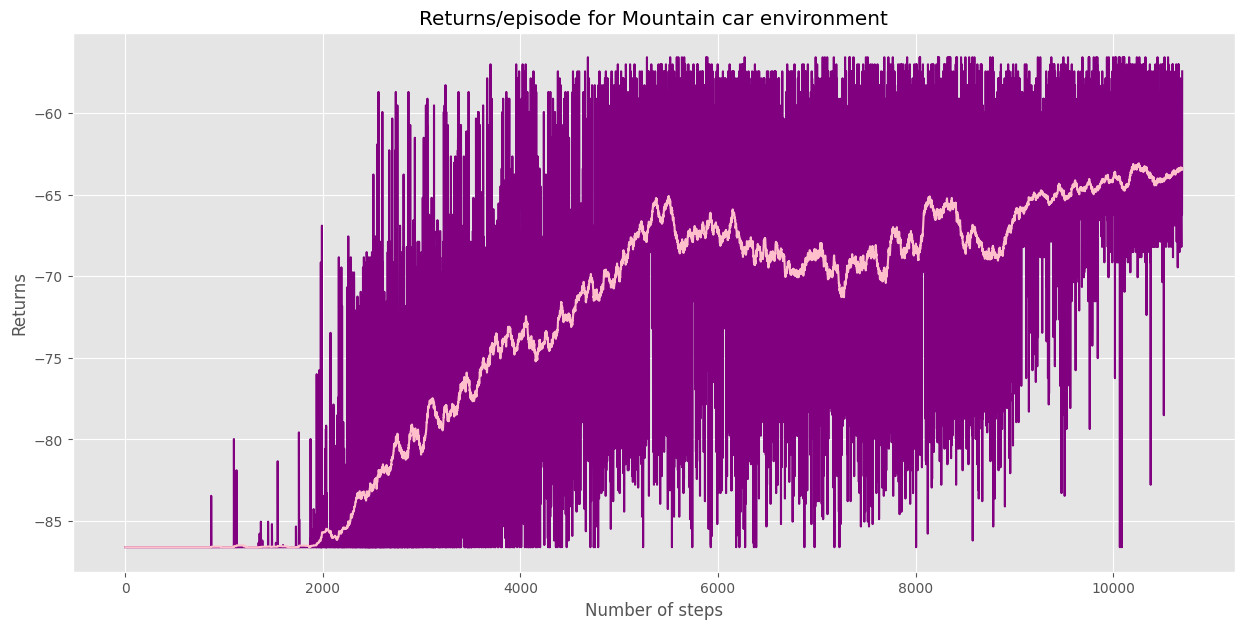

In [55]:
### YOUR PLOTTING CODE HERE
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(mountain_car_return,color = 'purple')
rolling_av = rolling_average(mountain_car_return, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Returns")
plt.title("Returns/episode for Mountain car environment")
plt.show()

In [13]:
mountain_car_length = np.load('mountain_car_lengths.npy')

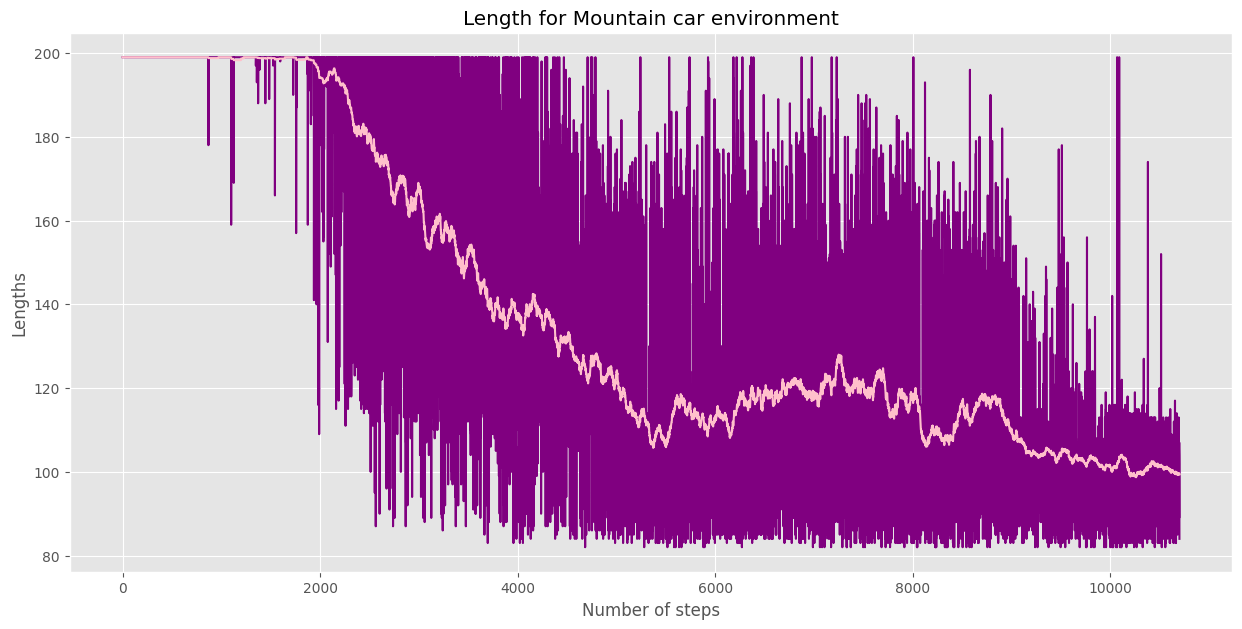

In [15]:
### YOUR PLOTTING CODE HERE
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(mountain_car_length,color = 'purple')
rolling_av = rolling_average(mountain_car_length, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Lengths")
plt.title("Length for Mountain car environment")
plt.show()

#### AcroBot

Test your implentation on the acrobot environment.  Training will take much longer than in the previous homeworks, so this time you won't have to find good hyper-parameters, or to train multiple runs.  This cell should take about 60-90 minutes to run.  After training, run the last cell in this notebook to view the policies which were obtained at 0%, 25%, 50%, 75% and 100% of the training.

In [56]:
env = envs['acrobot']
gamma = 0.99

# we train for many time-steps;  as usual, you can decrease this during development / debugging.
# but make sure to restore it to 1_500_000 before submitting.
num_steps = 1_500_000
num_saves = 5  # save models at 0%, 25%, 50%, 75% and 100% of training

replay_size = 200_000
replay_prepopulate_steps = 50_000

batch_size = 64
exploration = ExponentialSchedule(1.0, 0.01, 1_000_000)

# this should take about 90-120 minutes on a generic 4-core laptop
dqn_models, returns, lengths, losses = train_dqn(
    env,
    num_steps,
    num_saves=num_saves,
    replay_size=replay_size,
    replay_prepopulate_steps=replay_prepopulate_steps,
    batch_size=batch_size,
    exploration=exploration,
    gamma=gamma,
)

assert len(dqn_models) == num_saves
assert all(isinstance(value, DQN) for value in dqn_models.values())

# saving computed models to disk, so that we can load and visualize them later.
checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
torch.save(checkpoint, f'checkpoint_{env.spec.id}.pt')
np.save('acrobot_lengths.npy',lengths)
np.save('acrobot_losses.npy',losses)
np.save('acrobot_returns.npy',returns)

Episode: 13782 | Steps: 64 | Return: -46.91 | Epsilon: 0.01: 100%|█| 1500000/1500000 [1:07:56<00:00,


###### Plot the returns, lengths and losses obtained while running DQN on the acrobot environment.

Again, plot the raw data and the smoothened data **inside the same plot**, i.e. you should have 3 plots total.

In [58]:
### YOUR PLOTTING CODE HERE
acrobat_loss = np.load('acrobot_losses.npy')
acrobat_return = np.load('acrobot_returns.npy')

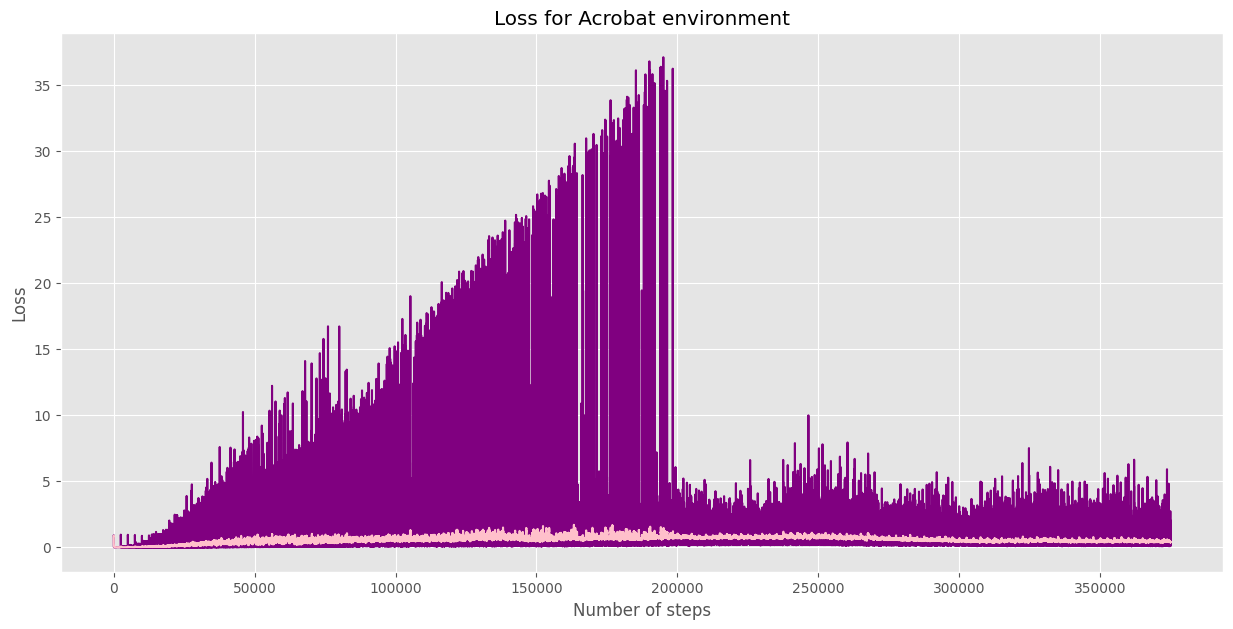

In [59]:
### YOUR PLOTTING CODE HERE
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(acrobat_loss,color = 'purple')
rolling_av = rolling_average(acrobat_loss, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Loss")
plt.title("Loss for Acrobat environment")
plt.show()

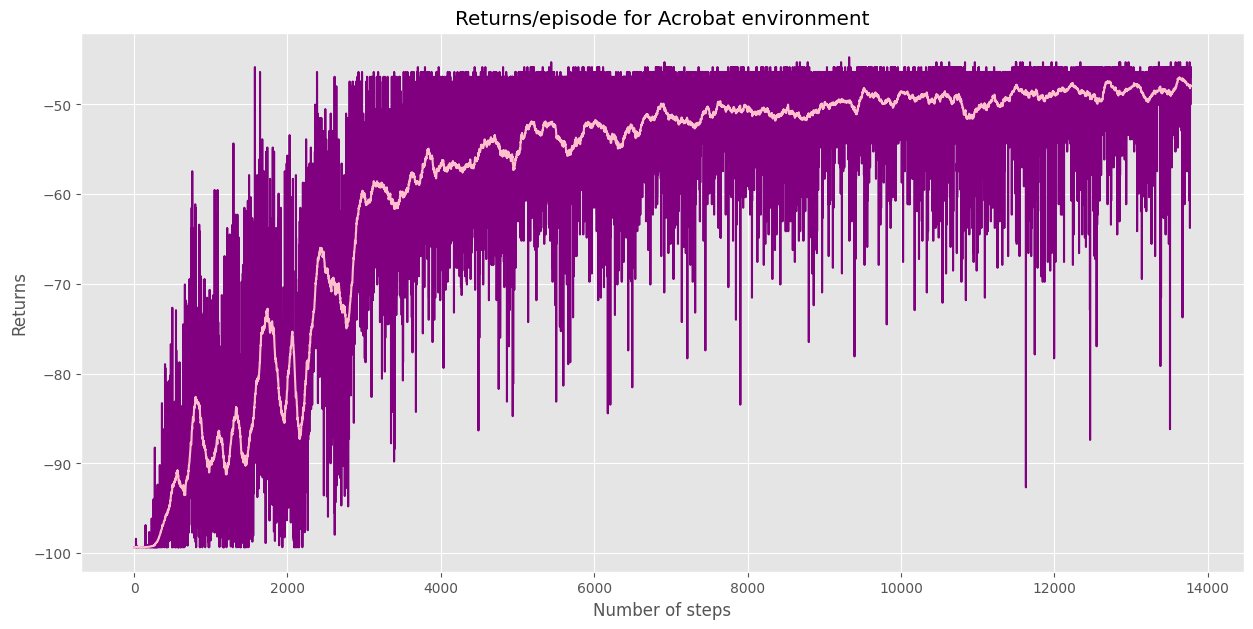

In [60]:
### YOUR PLOTTING CODE HERE
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(acrobat_return,color = 'purple')
rolling_av = rolling_average(acrobat_return, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Returns")
plt.title("Returns/episode for Acrobat environment")
plt.show()

In [16]:
acrobat_length = np.load('acrobot_lengths.npy')

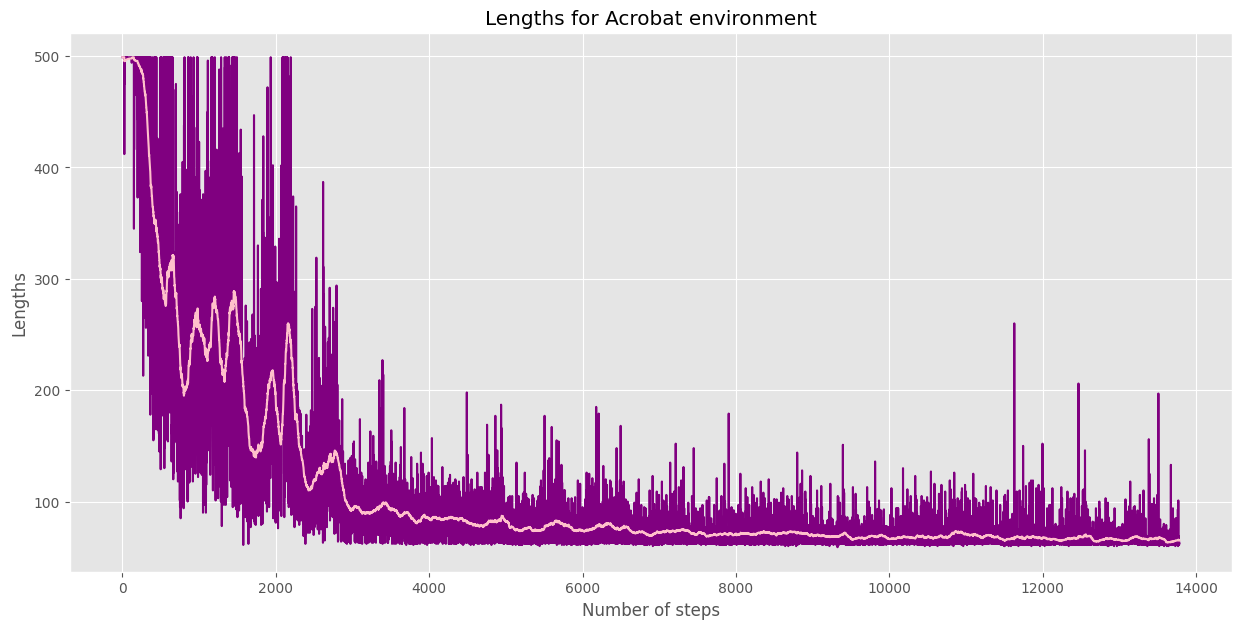

In [17]:
### YOUR PLOTTING CODE HERE
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(acrobat_length,color = 'purple')
rolling_av = rolling_average(acrobat_length, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Lengths")
plt.title("Lengths for Acrobat environment")
plt.show()

#### LunarLander

Test your implentation on the lunarlander environment.  Training will take much longer than in the previous homeworks, so this time you won't have to find good hyper-parameters, or to train multiple runs.  This cell should take about 60-90 minutes to run.  After training, run the last cell in this notebook to view the policies which were obtained at 0%, 25%, 50%, 75% and 100% of the training.

In [14]:
env = envs['lunarlander']
gamma = 0.99

# we train for many time-steps;  as usual, you can decrease this during development / debugging.
# but make sure to restore it to 1_500_000 before submitting.
num_steps = 1_500_000
num_saves = 5  # save models at 0%, 25%, 50%, 75% and 100% of training

replay_size = 200_000
replay_prepopulate_steps = 50_000

batch_size = 64
exploration = ExponentialSchedule(1.0, 0.01, 1_000_000)

# this should take about 90-120 minutes on a generic 4-core laptop
dqn_models, returns, lengths, losses = train_dqn(
    env,
    num_steps,
    num_saves=num_saves,
    replay_size=replay_size,
    replay_prepopulate_steps=replay_prepopulate_steps,
    batch_size=batch_size,
    exploration=exploration,
    gamma=gamma,
)

assert len(dqn_models) == num_saves
assert all(isinstance(value, DQN) for value in dqn_models.values())

# saving computed models to disk, so that we can load and visualize them later.
checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
torch.save(checkpoint, f'checkpoint_{env.spec.id}.pt')
np.save('lunar_lander_lengths.npy',lengths)
np.save('lunar_lander_losses.npy',losses)
np.save('lunar_lander_returns.npy',returns)

Episode: 4972 | Steps: 289 | Return: -18.07 | Epsilon: 0.01: 100%|█| 1500000/1500000 [2:14:24<00:00,


###### Plot the returns, lengths and losses obtained while running DQN on the lunarlander environment.

Again, plot the raw data and the smoothened data **inside the same plot**, i.e. you should have 3 plots total.

In [18]:
### YOUR PLOTTING CODE HERE
lunar_lander_loss = np.load('lunar_lander_losses.npy')
lunar_lander_return = np.load('lunar_lander_returns.npy')
lunar_lander_length = np.load('lunar_lander_lengths.npy')

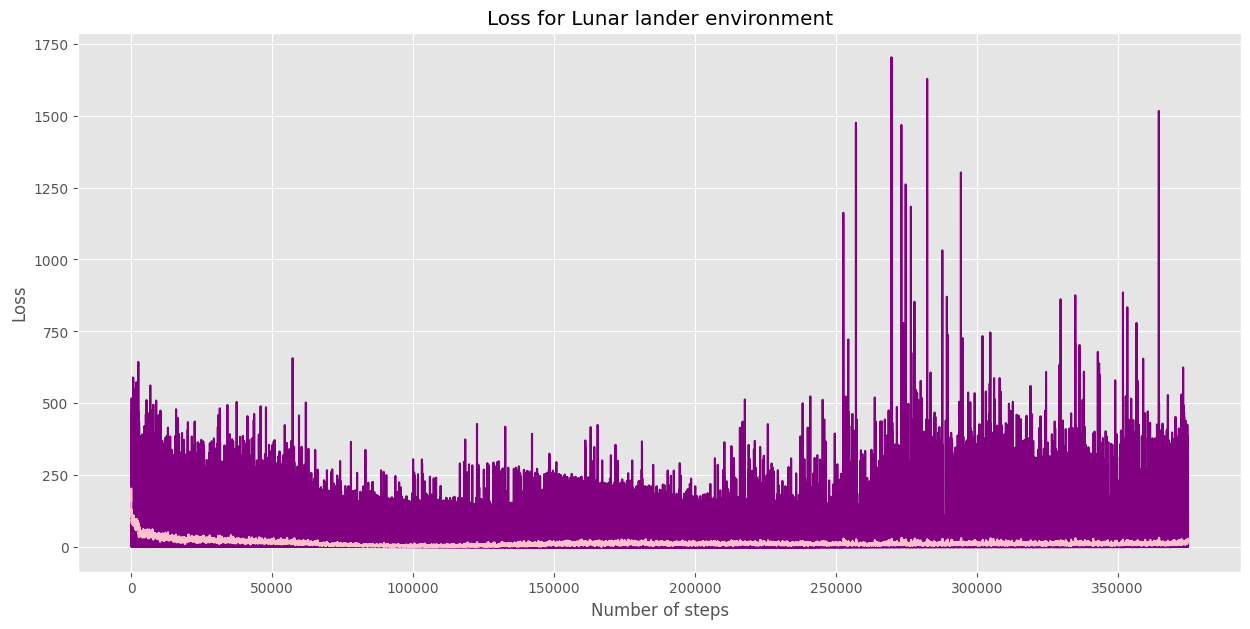

In [17]:
### YOUR PLOTTING CODE HERE
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(lunar_lander_loss,color = 'purple')
rolling_av = rolling_average(lunar_lander_loss, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Loss")
plt.title("Loss for Lunar lander environment")
plt.show()

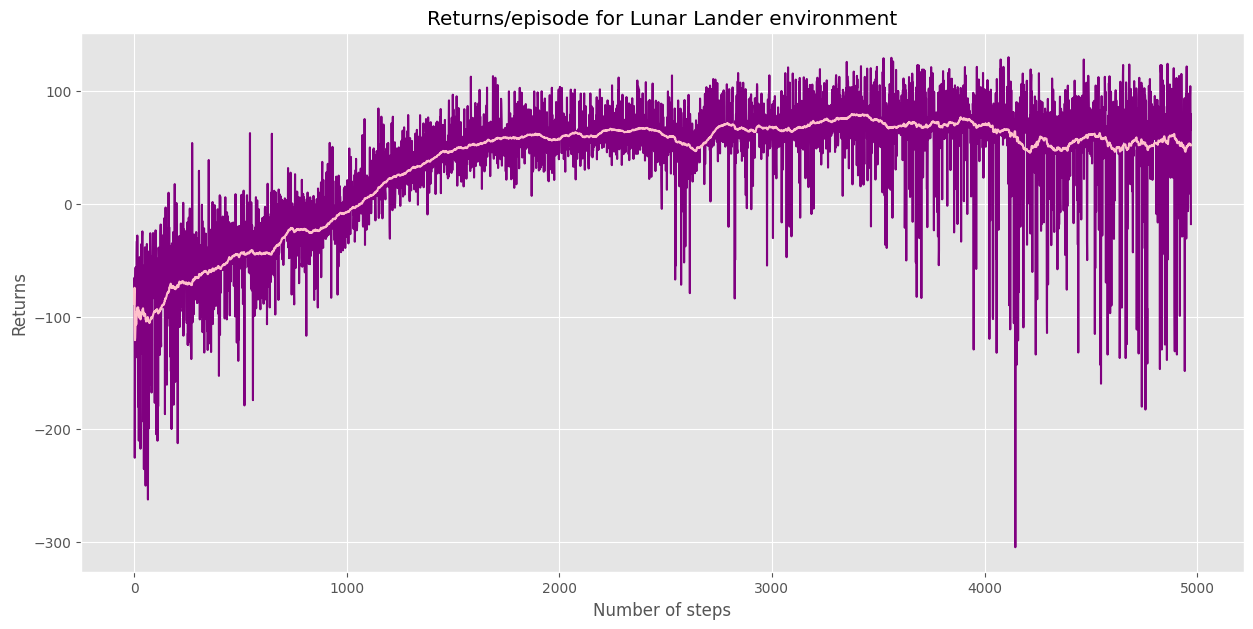

In [18]:
### YOUR PLOTTING CODE HERE
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(lunar_lander_return,color = 'purple')
rolling_av = rolling_average(lunar_lander_return, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Returns")
plt.title("Returns/episode for Lunar Lander environment")
plt.show()

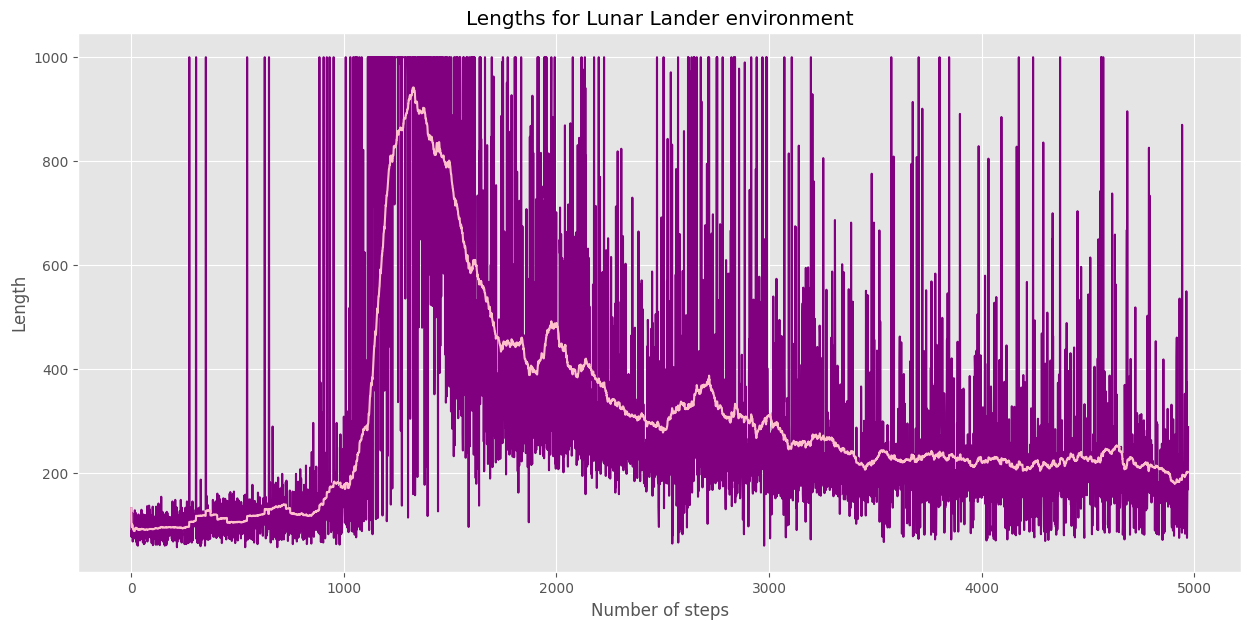

In [19]:
### YOUR PLOTTING CODE HERE
%matplotlib inline
plt.figure(figsize=(15,7))
plt.plot(lunar_lander_length,color = 'purple')
rolling_av = rolling_average(lunar_lander_length, window_size = 100)
plt.plot(rolling_av,color = 'pink')
plt.xlabel("Number of steps")
plt.ylabel("Length")
plt.title("Lengths for Lunar Lander environment")
plt.show()

### Visualization of the trained policies!

Run the cell below and push the buttons to view the progress of the policy trained using DQN.

In [22]:
pip install pyglet

     -------------------------------------- 858.3/858.3 KB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ravin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [19]:
pip show PyOpenGL

Name: PyOpenGL
Version: 3.1.5
Summary: Standard OpenGL bindings for Python
Home-page: http://pyopengl.sourceforge.net
Author: Mike C. Fletcher
Author-email: mcfletch@vrplumber.com
License: BSD
Location: c:\users\ravin\appdata\local\programs\python\python39\lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install PyOpenGL

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ravin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
pip show pyglet

Name: pyglet
Version: 1.5.27
Summary: Cross-platform windowing and multimedia library
Home-page: http://pyglet.readthedocs.org/en/latest/
Author: Alex Holkner
Author-email: Alex.Holkner@gmail.com
License: BSD
Location: c:\users\ravin\appdata\local\programs\python\python39\lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show PyOpenGL

Name: PyOpenGL
Version: 3.1.5
Summary: Standard OpenGL bindings for Python
Home-page: http://pyopengl.sourceforge.net
Author: Mike C. Fletcher
Author-email: mcfletch@vrplumber.com
License: BSD
Location: c:\users\ravin\appdata\local\programs\python\python39\lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [22]:
from OpenGL.GL import glPushMatrix

In [19]:
pip show Pygame=2.0.1

Note: you may need to restart the kernel to use updated packages.


In [21]:
buttons_all = []
for key_env, env in envs.items():
    try:
        checkpoint = torch.load(f'checkpoint_{env.spec.id}.pt')
    except FileNotFoundError:
        pass
    else:
        buttons = []
        for key, value in checkpoint.items():
            dqn = DQN.custom_load(value)
            
            def make_callback(env, dqn):
                def button_callback(button):
                    for b in buttons_all:
                        b.disabled = True
                        
                    render(env, lambda state: dqn(torch.tensor(state, dtype=torch.float)).argmax().item())
                    
                    for b in buttons_all:
                        b.disabled = False
                        
                return button_callback
                
            button = widgets.Button(description=f'{key.replace("_", ".")}%')
            button.on_click(make_callback(env, dqn))
            buttons.append(button)
        
        print(f'{key_env}:')
        display(widgets.HBox(buttons))
        buttons_all.extend(buttons)

cartpole:


mountaincar:


acrobot:


lunarlander:


### Q7 (2 pts): Analysis

For each environment, describe the progress of the training in terms of the behavior of the agent at each of the 5 phases of training (i.e. 0%, 25%, 50%, 75%, 100%).  Make sure you view each phase a few times so that you can see all sorts of variations.

Say something for each phase (i.e. this exercise is worth 1 point for every phase of every environment).  Start by describing the behavior at phase 0%, then, for each next phase, describe how it differs from the previous one, how it improves and/or how it becomes worse.  At the final phase (100%), also describe the observed behavior in absolute terms, and whether it has achieved optimality.

##### CartPole

* 0%) we start with epsilon = 1 - random policy, high exploration and low exploitation, and due to random decisions taken by agent, leads the falling down of the pole. episode lengths and rewatrds are poor due to random actions. 
* 25%) I Can see the exploitation of the strategy by agent. and it chooses to go left always, though its better than random but I think still not even close to optimal, as it leads to pole falling after a while. 
* 50%) Its more like balancing with momentum. its using leftward momentum by taking right actions to balance pole for longer duration. But its still not verticle(close to verticle), though its more balanced. not yet optimal.
* 75%) struggling to balance -- I would say its worse than 50% it failed to balance, i feel like the agent is overly cautious.
* 100%) still didnt reach the consistent optimality, there are still fluctuations in terms of rewards. Didnt learnt completely to maintain to be close to verticle 

##### MountainCar

* 0%) epsilon = 1 - high exploration. agent explores extensilely, but fails to discover the optimal momentum required to push the cart to the top of the mountain. Agent is trtying different actions without understanding on how to reach the goal.
* 25%) Low exploration - the strategy of going backward uphill and using the downward force to reach the top. stage shows improvement over 0%, which talks about initial learning progress.
* 50%) it balances exploitation and exploration, agent starts exploitaing its previous discovery of gaining momentum, This leads to uncessary backward and forward movements. but still the agent reaches the goal.
* 75%) it learns to increase the momentum efficiently to reach the goal quickly,  its also minizes the number of swings
* 100%) At the highest level of exploitation (0% exploration), the DQN agent reaches optimality. It executes momentum swings (around 2) required to reach the goal.

##### Acrobot

* 0%) It attempts to gain momentum by moving the entire arm, but fails to reach goal. 100% exploration rate
* 25%) due to continued exploration, the agent reaches the goal very rarely. There's a spike in the length of episodes, indicating difficulty in achieving the goal.
* 50%) It takes more time to gain momentum. The agent attempts to swing more frequently and fails to reach the goal. 
* 75%) There's improvement over previous stages.  Agent starts utilizing momentum more effectively. It consistently reaches the goal with increased speed.
* 100%) The agent's time to reach the goal decreases compared to the 75% stage, looks like agent has likely reached optimality.

##### LunarLander

* 0%) agent explores randomly (100% exploration) and does not fire any engines. It tries to use free fall to its advantage, but due to the random policy, it crashes.
* 25%) The policy of firing all engines does not lead to reaching the goal effectively.resulting in either floating in mid-air or landing in the wrong place.
* 50%) The agent optimizes engine firing behavior. Uisng the reverse thrust, starts exploiting free fall to its advantage.
* 75%) agent refines its strategy by using thrusters alternatively to reduce penalties further. This leads in reaching the goal state 99% of the time 
* 100%) the agent behaves similarly to the 75% stage but reaches the goal consistently 